# Summary
本調査では、t検定およびスピア万相関係数、いずれも統計的有意は認められなかった。

NEOマーケティングのご厚意で追加データを提供してもらったので、今後の参考のために同様の解析を行う。

最大の感心は、サンプル数が必要十分のときに有意差が現れるかどうか。

なお、今回のデータはすでにNEOマーケティングでクリーニング行われたもの。

# チェックポイント
- いつ行われた調査のデータか？
- 回答時間の分布
- 有効な自由記述回答のみを選択できていたか？
- 有効な自由記述回答の割合は十分だったか？

# データ読み込み

In [2]:
import pandas as pd

In [3]:
# Load the raw data
df = pd.read_excel('../../RawData/RawData_extra.xlsx', sheet_name=1, header=0, index_col=0)

In [4]:
# Rename variables
var_df = pd.read_excel('../../Materials/variables.xlsx', sheet_name=1, header=0, index_col=None)
var_dict = dict(zip(var_df['name1'], var_df['name2']))
df = df.rename(columns=var_dict)

In [5]:
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:28,2023/05/19-12:55:05,00:05:37,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
2,2023/05/19-12:56:08,2023/05/19-13:06:05,00:09:57,2,36,11,1,3,2,1,...,2,言ったことを守る,5,考えて行動するので,2,行動がはやいので,6,明るい性格なので,COMP,3
3,2023/05/19-13:05:26,2023/05/19-13:13:17,00:07:51,1,43,23,1,4,3,2,...,2,回答なし,5,回答なし,3,回答なし,6,回答なし,COMP,4
4,2023/05/19-13:06:19,2023/05/19-13:18:47,00:12:28,1,55,16,1,6,1,2,...,5,子供なので何とも言えない。,4,どちらでもないと思う。,2,いろいろな事を積極的にするので。,7,知らない人にも平気で話せる。,COMP,6
5,2023/05/19-13:02:30,2023/05/19-13:19:05,00:16:35,2,53,7,1,1,3,1,...,5,刹那主義で、人を養うスキルがない,3,大事な判断を間違う,2,行動力がある,5,老若男女誰とでもコミュニケーションが出来る,COMP,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 1 to 140
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   start                        140 non-null    object
 1   end                          140 non-null    object
 2   rt                           140 non-null    object
 3   self_sex                     140 non-null    int64 
 4   self_age                     140 non-null    int64 
 5   residence                    140 non-null    int64 
 6   participation                140 non-null    int64 
 7   IOS_score                    140 non-null    int64 
 8   target_likedislike           140 non-null    int64 
 9   target_sex                   140 non-null    int64 
 10  target_age                   140 non-null    int64 
 11  relationship                 140 non-null    object
 12  self_tolerance_score         140 non-null    int64 
 13  self_tolerance_text          140 non-nul

# データの取得日

In [7]:
end = pd.to_datetime(df['end'])
print('FROM: ' + str(end.min()))
print('END: ' + str(end.max()))

FROM: 2023-05-19 12:55:05
END: 2023-05-28 10:42:48


<Axes: >

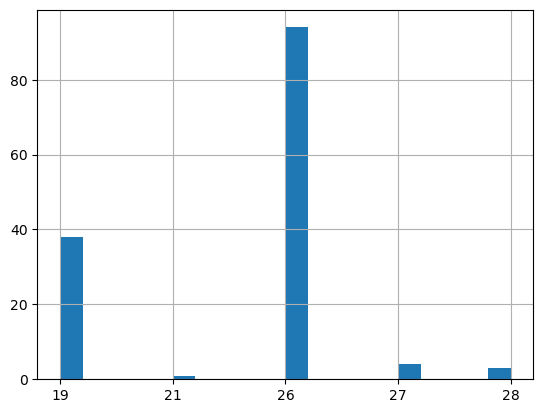

In [8]:
end.dt.strftime('%d').hist(bins=20)

# 回答所要時間の分布

In [9]:
# Convert Datatimeindex to a numeric format
rt = pd.to_datetime(df.end) - pd.to_datetime(df.start)
df['rt'] = pd.to_timedelta(rt).dt.total_seconds()

In [10]:
df['rt'].describe()

count       140.000000
mean       6894.614286
std       61137.735046
min          80.000000
25%         255.500000
50%         370.500000
75%         610.250000
max      705269.000000
Name: rt, dtype: float64

<Axes: >

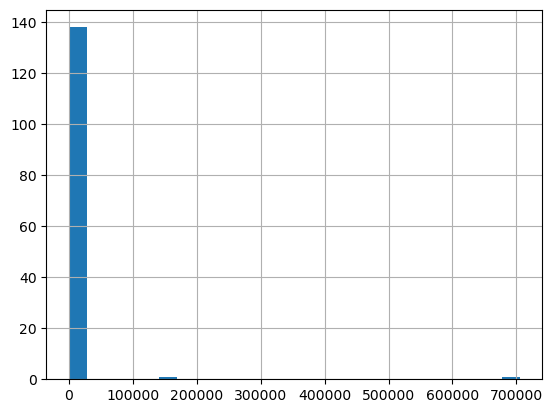

In [11]:
df['rt'].hist(bins=25)

In [12]:
# the lowest RTs
df.sort_values('rt').head(10)

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
94,2023/05/26-11:48:59,2023/05/26-11:50:19,80.0,1,52,12,1,5,4,2,...,6,わかりません,5,わかりません,6,わかりません,5,わかりません,COMP,12
34,2023/05/19-18:26:18,2023/05/19-18:27:45,87.0,2,31,23,1,7,6,4,...,7,なし,7,なし,7,なし,7,なし,COMP,14
9,2023/05/19-13:36:58,2023/05/19-13:38:28,90.0,2,48,17,1,5,4,2,...,4,回答なし,4,回答なし,4,回答なし,4,回答なし,COMP,12
125,2023/05/26-13:48:32,2023/05/26-13:50:18,106.0,1,39,38,1,3,4,1,...,3,なし,6,回答なし,4,冷静,6,上手い,COMP,10
128,2023/05/26-14:49:21,2023/05/26-14:51:10,109.0,1,36,27,1,5,5,1,...,4,普通,5,たまに,4,普通,4,回答なし,COMP,12
22,2023/05/19-15:38:44,2023/05/19-15:40:38,114.0,1,54,14,1,7,4,1,...,6,特にない,3,なんとなく,4,分からない,6,なんと,COMP,14
70,2023/05/26-11:41:11,2023/05/26-11:43:08,117.0,2,35,27,1,1,6,1,...,4,コミュ障害,1,マザコンロリコンバカ,7,コミュ障害,1,コミュ障害,COMP,8
116,2023/05/26-12:31:05,2023/05/26-12:33:20,135.0,1,36,14,1,7,6,4,...,6,うそつく「,2,かるい,4,微妙な,3,かもなくふかもなく,COMP,14
33,2023/05/19-18:19:00,2023/05/19-18:21:22,142.0,1,52,13,1,7,4,1,...,4,なんとなく,4,なんとなく,5,なんとなく,5,なんとなく,COMP,14


In [13]:
# the longest RTs
df.sort_values('rt', ascending=False).head(10)

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
137,2023/05/19-14:05:01,2023/05/27-17:59:30,705269.0,1,48,27,1,4,4,2,...,4,回答なし,4,特にありません,4,特にありません,4,特にありません,COMP,11
139,2023/05/26-11:47:32,2023/05/28-10:39:10,168698.0,1,55,13,1,6,3,2,...,5,まあそう感じる,5,細かいから,4,状況次第だから,4,普通にコミュニケーションは取れると思っている,COMP,6
132,2023/05/26-19:21:45,2023/05/26-23:41:53,15608.0,2,53,4,1,7,5,1,...,1,回答なし,7,「石橋を叩いて誰かを渡らせてからオレが渡る」,7,「○○が□□してくれたらなぁ｡」,2,「あんまり人間好きじゃないし、信用できない｡」,COMP,14
124,2023/05/26-11:48:05,2023/05/26-13:31:47,6222.0,1,54,14,1,3,4,2,...,7,生活に関する全ての事において、責任は全くとりたくない性格なので、無責任である。,2,先々の返済の大変さなどを考えずにクレジットカードで買い物をしてしまう。 いつも家計が苦しいと...,7,外部の人とのコミュニケーションに全く積極的でない。 ご近所付き合いも下手なので、自治体の行事...,1,自治体のお祭りが今年から復活したが、妻だけ見てもいない。 数年前まで子供会は嫌々出席していた...,COMP,10
36,2023/05/19-18:32:52,2023/05/19-19:31:41,3529.0,2,32,27,1,5,4,1,...,5,回答なし,7,何事も考えすぎる,5,回答なし,4,人と話すのはあまり苦手,COMP,12
121,2023/05/26-12:08:13,2023/05/26-12:48:55,2442.0,1,54,14,1,2,5,1,...,7,良くないことがあると人のせいにするかツイてないせいにして、自分の非を認めようとしない。,1,計画性がなく、行き当たりばったりなことをして、毎回後悔することを繰り返している。,6,泣き寝入りすることになっても、面倒なことには関わらない。,2,近所付き合いがほとんどない,COMP,9
114,2023/05/26-11:40:15,2023/05/26-12:16:32,2177.0,1,49,13,1,4,5,1,...,2,最後までやる,7,回答なし,6,回答なし,2,独りが好き,COMP,11
111,2023/05/26-11:39:58,2023/05/26-12:11:19,1881.0,2,59,27,1,2,3,2,...,3,一般的な事は責任感あると思うが、人雇う時に面接に人が来なかったからと、遅刻はする反省しない、...,3,解答なし,2,お店で隣り合わせた子供連れがいたら、子供に必ずちょっかいかける,2,誰にでもニコニコ話しかける,COMP,2
113,2023/05/26-11:47:44,2023/05/26-12:16:00,1696.0,2,59,40,1,6,2,2,...,2,一度決めたことは最後までやる,6,八方美人なところがある,1,いけない時も必ず断らない,7,誘われたら断らない,COMP,6


In [14]:
# IQR
q1 = df['rt'].quantile(0.25)
q3 = df['rt'].quantile(0.75)
iqr = q3 - q1

# Participants who spent time less than 1.5 IQR below the lower quatile (Q1)
lower_limit = q1 - 1.5 * iqr
df_lowerIQR = df[df['rt'] <= lower_limit]

# Participants who spent time more than 1.5 IQR above the upper  quatile (Q3)
upper_limit = q3 + 1.5 * iqr
df_upperIQR = df[df['rt'] >= upper_limit]


In [15]:
df_lowerIQR

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,


In [16]:
df_upperIQR

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
28,2023/05/19-16:34:02,2023/05/19-16:58:09,1447.0,2,59,11,1,4,4,1,...,5,最後まで諦めずにやり切る責任感がある,6,何事にも上手く対応するために慎重にやっている,2,何事にも前向きに対応することが好かれる要因,6,多くの仲間がいて一緒に行動,COMP,11
36,2023/05/19-18:32:52,2023/05/19-19:31:41,3529.0,2,32,27,1,5,4,1,...,5,回答なし,7,何事も考えすぎる,5,回答なし,4,人と話すのはあまり苦手,COMP,12
96,2023/05/26-11:30:15,2023/05/26-11:50:48,1233.0,1,42,32,1,5,2,2,...,3,自分の世界を持っている,6,責任感がある,3,アウトドア派,6,友人が多い,COMP,5
100,2023/05/26-11:33:24,2023/05/26-11:52:57,1173.0,2,46,15,1,3,1,1,...,3,回答なし,1,すべて自分の都合だけで、私を振り回している。予定が決まらない。いつもその場その場の気分で行動する。,7,とても仲が良く、4年近く友達以上恋人未満な関係だが、付き合うに至っていない,6,仕事関係や友達との付き合いはとても大事にしている 誘われれば断らない,COMP,3
103,2023/05/26-11:34:10,2023/05/26-11:53:57,1187.0,1,53,27,1,7,1,2,...,2,途中で投げ出さない,5,認識している範囲ではしっかりしてる,3,比較的,5,明るい,COMP,7
106,2023/05/26-11:40:03,2023/05/26-12:01:30,1287.0,2,53,27,1,6,2,1,...,7,無責任夫だから、妻は責任感増し増しになりつつある。,5,人前では軽率に見えても、結婚相手はかなり慎重に選んだはず…,5,結婚前のアプローチは積極的、今は奥さんがいないと何もできないダメ夫…,4,仮面被って社交的、実は非社交的人間。,COMP,6
107,2023/05/26-11:41:42,2023/05/26-12:02:00,1218.0,2,55,28,1,2,3,1,...,1,予定は変更しない、必ず遂行する,4,仕事の上では慎重でだがプライベートでは軽率な傾向があり食器を壊したり機器を壊したりする,4,積極的でも消極的でもない,4,仕事の付き合いは便宜上するがプライベートではあまり社交的ではない,COMP,2
108,2023/05/26-11:42:19,2023/05/26-12:04:13,1314.0,2,55,13,1,3,1,2,...,1,旦那様の面倒も介護もワンちゃんの面倒も一生懸命されるのでそう思います。,5,慎重な方ですが昨今怖い事件が多いのでもっと用心してドアを開けたりした方が良いと思いそう伝えて...,1,元気で活動的な方なのでそのように感じます。,7,お友達がたくさんいらっしゃって毎日のように来客があるので社交的だと思います。,COMP,3
111,2023/05/26-11:39:58,2023/05/26-12:11:19,1881.0,2,59,27,1,2,3,2,...,3,一般的な事は責任感あると思うが、人雇う時に面接に人が来なかったからと、遅刻はする反省しない、...,3,解答なし,2,お店で隣り合わせた子供連れがいたら、子供に必ずちょっかいかける,2,誰にでもニコニコ話しかける,COMP,2


## 問題点
- 回答時間が長いからと言って不適切な回答ではない。むしろ適切な回答まで削除してしまっている。
- 逆に、回答時間が短いものは不適切な回答が多く見られるが、まったく除外できていない。
- RTの分布が右にすそ野が広い分布になっているため、IQRによる除外はあてにならなかったと考えられる。

## 改善案
方針：回答時間以外の指標で除外
- step1) 頻出上位N個の記述を空白に置換
- step2) 記述回答がすべて同じ被験者を除外

In [17]:
textvar_name = ['self_tolerance_text', 'self_pleasantness_text', 'self_responsibility_text',
		'self_carefulness_text', 'self_activeness_text', 'self_sociability_text',
		'target_tolerance_text', 'target_pleasantness_text', 'target_responsibility_text',
		'target_carefulness_text', 'target_activeness_text', 'target_sociability_text',
		]

### Step1: 頻出上位N個の記述回答を空白に置換

In [18]:
s_concat = pd.Series(dtype=object)
for col in textvar_name:
	s_concat = pd.concat([s_concat, df.loc[:, col]], ignore_index=True)

In [19]:
s_concat.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1680 entries, 0 to 1679
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
1680 non-null   object
dtypes: object(1)
memory usage: 13.3+ KB


In [20]:
s_concat

0                             怒ったことがない
1                    相手が悪気がなかったら仕方ないので
2           基本怒らないけど、人並みにイライラしたりはするから。
3       ある程度のことであれば、やなことをされても、ゆるしてしまう。
4                             どちらの面もある
                     ...              
1675                           どちらでもない
1676                           特にありません
1677                              回答なし
1678            普通にコミュニケーションは取れると思っている
1679                           友達が多いから
Length: 1680, dtype: object

In [21]:
s_concat.value_counts().head(30)

回答なし                         235
なんとなく                         28
なし                            17
普通                            15
特にありません                       14
特になし                          11
回答無し                          11
わかりません                        11
特にない                           7
特に無し                           5
コミュ障害                          5
怒らない                           5
普通くらい                          4
どちらでもない                        4
友達が多いから                        3
平均的                            3
分からない                          3
独りが好き                          3
社交的                            3
いい感じ。                          3
回答ナシ                           3
ごく普通                           3
友人が多い                          3
どちらとも言えない                      3
誰とでも仲良くなれる                     3
特無し                            3
人といると疲れやすくなったから                2
接客業なので                         2
とても費用対効果が良さそうなので試しに使ってみたい      2
そうではなさそう                       2
Name: coun

In [22]:
# rep_list = list(s_concat.value_counts()[s_concat.value_counts() > 10].index) # 頻出回数 > 10
rep_list = list(s_concat.value_counts()[0:10].index) # 頻出上位10語（注：オリジナルデータでは上位20語。調査会社によるクリーニングの影響と思われる）
print(rep_list)

['回答なし', 'なんとなく', 'なし', '普通', '特にありません', '特になし', '回答無し', 'わかりません', '特にない', '特に無し']


### Step2: 記述回答がすべておなじ被験者を除外

In [23]:
df2 = df.replace(rep_list, '').drop_duplicates(subset=textvar_name, keep=False)

### チェック

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 1 to 140
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start                        138 non-null    object 
 1   end                          138 non-null    object 
 2   rt                           138 non-null    float64
 3   self_sex                     138 non-null    int64  
 4   self_age                     138 non-null    int64  
 5   residence                    138 non-null    int64  
 6   participation                138 non-null    int64  
 7   IOS_score                    138 non-null    int64  
 8   target_likedislike           138 non-null    int64  
 9   target_sex                   138 non-null    int64  
 10  target_age                   138 non-null    int64  
 11  relationship                 138 non-null    object 
 12  self_tolerance_score         138 non-null    int64  
 13  self_tolerance_text      

In [25]:
df2.loc[:, textvar_name].head(10)

,self_tolerance_text,self_pleasantness_text,self_responsibility_text,self_carefulness_text,self_activeness_text,self_sociability_text,target_tolerance_text,target_pleasantness_text,target_responsibility_text,target_carefulness_text,target_activeness_text,target_sociability_text
MID,,,,,,,,,,,,
1,怒ったことがない,よく道を聞かれる,世話好きでリーダー肌,計画する前に動く,行動力がある,友達がいない,怒らない,優しそうでお人好し,仕事を抱え込む,チェックが細かい,基本受け身,話が下手
2,相手が悪気がなかったら仕方ないので,別け隔てなく接してるつもりなので,最後までやり遂げたいので,考えて行動してるつもりなので,なるべく動くので,色々な人と仲良くなりたいので,ミスを許してくれる,人当たりがよいので,言ったことを守る,考えて行動するので,行動がはやいので,明るい性格なので
3,基本怒らないけど、人並みにイライラしたりはするから。,苦手な相手とかにはそっけなくしてしまったりするから,仕事の面などでも責任をもってやりきるから,そこまで軽率な行動をとった記憶はないから,人付き合いの面では特に消極的だと思う,そこまで知らない人がいる食事会などでは、帰りたくなってしまうから,,,,,,
4,ある程度のことであれば、やなことをされても、ゆるしてしまう。,先の回答のとおり。,あくまでも自己評価,あくまでも自己評価,あくまでも自己評価だが、何事にも慎重なため。,知らない人にはなかなか声をかけれない。,,だれからでも好かれる性格。,子供なので何とも言えない。,どちらでもないと思う。,いろいろな事を積極的にするので。,知らない人にも平気で話せる。
5,どちらの面もある,相談業務や対人業務での評価で,自分より有能な人材が現れるまで辛くてもキャパオーバーでも辞められない,そうやって生きてきた,思い切った行動は出来ず、保守的で安定第一 仕事以外は人と関わりたくない,誰とでもコミュニケーション取れるが、独りが好き,弱い者に優しい,子煩悩で妻子には優しい,刹那主義で、人を養うスキルがない,大事な判断を間違う,行動力がある,老若男女誰とでもコミュニケーションが出来る
6,感情的にならないようにしているため,中立的であるため,責任をもって行いたいため,熟慮するため,積極的にコミュニケーションをとるため,わかりやすいため,余裕があるため,社交性があるため,最後まで通すため,熟慮するため,リードしてくれるため,コミュニケーション能力が高いため
7,優しくて、許してくれる。,愛想があり、親しみやすい。,エピソードは、思い浮かばないが、決まりは守るし、ルールも守る 常識人である,,音楽に関しては、積極的だが、その他については、出不精である。,,,,,,,
8,広くありたいと思っている,他人からの評価は分からない,できれば言い逃れしたい,うっかりしている,常に受け身,積極的に話せない,少しのことで暴言を吐いたり暴れる,すぐ恨みをもつ,働かない,どちらともいえない,すぐ逃げる,心を開かない
9,,,,,,,,夫,,,,


In [26]:
# check
s_concat2 = pd.Series(dtype=object)
for col in textvar_name:
	s_concat2 = pd.concat([s_concat2, df2.loc[:, col]], ignore_index=True)

In [27]:
s_concat2.value_counts().head(30)

                     330
コミュ障害                  5
怒らない                   5
どちらでもない                4
普通くらい                  4
回答ナシ                   3
特無し                    3
いい感じ。                  3
誰とでも仲良くなれる             3
友人が多い                  3
分からない                  3
どちらとも言えない              3
社交的                    3
平均的                    3
ごく普通                   3
独りが好き                  3
友達が多いから                3
普通だと思うからです。            2
愛想がいい                  2
関わりたくない                2
友人が多いから                2
友達がいない                 2
親から当たられる               2
アウトドア派                 2
自己中心的                  2
人見知りだから                2
人見知りしない                2
優しい                    2
社交的なバランスが、取れているから      2
親切                     2
Name: count, dtype: int64

In [28]:
print('Num. of Original Samples: ' + str(len(df)))
print('Num. of Excluded Samples: ' + str(len(df) - len(df2)))
print('Num. of Remained Samples: ' + str(len(df2)))
print('Completion Ration: ' + str(len(df2) / len(df)))


Num. of Original Samples: 140
Num. of Excluded Samples: 2
Num. of Remained Samples: 138
Completion Ration: 0.9857142857142858


# Output
Save:
- Text data as txt
- Data Frame as xlsx

## Text Data

In [29]:
text_vars_self = [
	'self_tolerance_text',
	'self_pleasantness_text',
	'self_responsibility_text',
	'self_carefulness_text',
	'self_activeness_text',
	'self_sociability_text']

text_vars_target = [
	'target_tolerance_text',
	'target_pleasantness_text',
	'target_responsibility_text',
	'target_carefulness_text',
	'target_activeness_text',
	'target_sociability_text']

In [30]:
text_vars_all = text_vars_self + text_vars_target

In [31]:
df2.loc[:, text_vars_all].head()

,self_tolerance_text,self_pleasantness_text,self_responsibility_text,self_carefulness_text,self_activeness_text,self_sociability_text,target_tolerance_text,target_pleasantness_text,target_responsibility_text,target_carefulness_text,target_activeness_text,target_sociability_text
MID,,,,,,,,,,,,
1,怒ったことがない,よく道を聞かれる,世話好きでリーダー肌,計画する前に動く,行動力がある,友達がいない,怒らない,優しそうでお人好し,仕事を抱え込む,チェックが細かい,基本受け身,話が下手
2,相手が悪気がなかったら仕方ないので,別け隔てなく接してるつもりなので,最後までやり遂げたいので,考えて行動してるつもりなので,なるべく動くので,色々な人と仲良くなりたいので,ミスを許してくれる,人当たりがよいので,言ったことを守る,考えて行動するので,行動がはやいので,明るい性格なので
3,基本怒らないけど、人並みにイライラしたりはするから。,苦手な相手とかにはそっけなくしてしまったりするから,仕事の面などでも責任をもってやりきるから,そこまで軽率な行動をとった記憶はないから,人付き合いの面では特に消極的だと思う,そこまで知らない人がいる食事会などでは、帰りたくなってしまうから,,,,,,
4,ある程度のことであれば、やなことをされても、ゆるしてしまう。,先の回答のとおり。,あくまでも自己評価,あくまでも自己評価,あくまでも自己評価だが、何事にも慎重なため。,知らない人にはなかなか声をかけれない。,,だれからでも好かれる性格。,子供なので何とも言えない。,どちらでもないと思う。,いろいろな事を積極的にするので。,知らない人にも平気で話せる。
5,どちらの面もある,相談業務や対人業務での評価で,自分より有能な人材が現れるまで辛くてもキャパオーバーでも辞められない,そうやって生きてきた,思い切った行動は出来ず、保守的で安定第一 仕事以外は人と関わりたくない,誰とでもコミュニケーション取れるが、独りが好き,弱い者に優しい,子煩悩で妻子には優しい,刹那主義で、人を養うスキルがない,大事な判断を間違う,行動力がある,老若男女誰とでもコミュニケーションが出来る


In [32]:
filename = './output01_all.txt'
with open(filename, 'w') as f:
	df2_string = df2.loc[:, text_vars_all].to_string(header=True, index=True)
	f.write(df2_string)

In [33]:
filename = './output01_self.txt'
with open(filename, 'w') as f:
	df2_string = df2.loc[:, text_vars_self].to_string(header=True, index=True)
	f.write(df2_string)

In [34]:
filename = './output01_target.txt'
with open(filename, 'w') as f:
	df2_string = df2.loc[:, text_vars_target].to_string(header=True, index=True)
	f.write(df2_string)

## Data Frame

In [35]:
df2.drop(text_vars_all, axis='columns', inplace=True)
df2.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,self_activeness_score,self_sociability_score,target_tolerance_score,target_pleasantness_score,target_responsibility_score,target_carefulness_score,target_activeness_score,target_sociability_score,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:28,2023/05/19-12:55:05,337.0,2,40,23,1,2,2,1,...,1,2,1,7,2,7,7,2,COMP,2
2,2023/05/19-12:56:08,2023/05/19-13:06:05,597.0,2,36,11,1,3,2,1,...,6,5,2,6,2,5,2,6,COMP,3
3,2023/05/19-13:05:26,2023/05/19-13:13:17,471.0,1,43,23,1,4,3,2,...,5,2,5,4,2,5,3,6,COMP,4
4,2023/05/19-13:06:19,2023/05/19-13:18:47,748.0,1,55,16,1,6,1,2,...,6,1,4,7,5,4,2,7,COMP,6
5,2023/05/19-13:02:30,2023/05/19-13:19:05,995.0,2,53,7,1,1,3,1,...,6,4,3,4,5,3,2,5,COMP,1


In [36]:
df2.columns

Index(['start', 'end', 'rt', 'self_sex', 'self_age', 'residence',
       'participation', 'IOS_score', 'target_likedislike', 'target_sex',
       'target_age', 'relationship', 'self_tolerance_score',
       'self_pleasantness_score', 'self_responsibility_score',
       'self_carefulness_score', 'self_activeness_score',
       'self_sociability_score', 'target_tolerance_score',
       'target_pleasantness_score', 'target_responsibility_score',
       'target_carefulness_score', 'target_activeness_score',
       'target_sociability_score', 'completion', 'stratumID'],
      dtype='object')

In [37]:
filename = './output01_all.csv'
df2.to_csv(filename, index=True)